In [1]:
import time, sys

import matplotlib.pyplot as plt

import numpy as np

import tensorflow as tf

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Prepare the data

In [2]:
num_classes = 10 # 10 classes, digits from 0 to 9

# Data split between train and test sets
digits = load_digits()
x_train, x_test, y_train, y_test = train_test_split(digits.images, digits.target)

print('Original x_train shape:', x_train.shape)
print('Original y_train shape:', y_train.shape)
print('Original x_test shape:', x_test.shape)
print('Original y_test shape:', y_test.shape)

# Reshape
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

input_shape = x_train[0].shape # Input image dimensions

# Convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test  = tf.keras.utils.to_categorical(y_test, num_classes)

print('\nInput shape: ', input_shape)
print('\nReshaped x_train shape:', x_train.shape)
print('Reshaped y_train shape:', y_train.shape)
print('Reshaped x_test shape:', x_test.shape)
print('Reshaped y_test shape:', y_test.shape)
print('\n', x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('\nOne hot enconding: {}'.format(y_train[0, :]))

Original x_train shape: (1347, 8, 8)
Original y_train shape: (1347,)
Original x_test shape: (450, 8, 8)
Original y_test shape: (450,)

Input shape:  (8, 8, 1)

Reshaped x_train shape: (1347, 8, 8, 1)
Reshaped y_train shape: (1347, 10)
Reshaped x_test shape: (450, 8, 8, 1)
Reshaped y_test shape: (450, 10)

 1347 train samples
450 test samples

One hot enconding: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


# Build the model

In [3]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=input_shape))
# 2 convolutional layers...
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
# ...and 1 fully connected layers
model.add(tf.keras.layers.Dense(num_classes, activation='softmax')) # One Neuron for each class
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 7, 7, 32)          160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 64)          8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                6

# Train the model

In [4]:
%time

batch_size = 128
epochs     = 25

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 11 µs
Train on 1212 samples, validate on 135 samples
Epoch 1/25
1212/1212 [==============================] - 4s 3ms/sample - loss: 3.5450 - accuracy: 0.1180 - val_loss: 1.9872 - val_accuracy: 0.2889
Epoch 2/25
1212/1212 [==============================] - 1s 665us/sample - loss: 2.2972 - accuracy: 0.1840 - val_loss: 1.7985 - val_accuracy: 0.4963
Epoch 3/25
1212/1212 [==============================] - 1s 606us/sample - loss: 1.9248 - accuracy: 0.3309 - val_loss: 1.6465 - val_accuracy: 0.6222
Epoch 4/25
1212/1212 [==============================] - 1s 635us/sample - loss: 1.7833 - accuracy: 0.3853 - val_loss: 1.4449 - val_accuracy: 0.6963
Epoch 5/25
1212/1212 [==============================] - 1s 706us/sample - loss: 1.6327 - accuracy: 0.4571 - val_loss: 1.2611 - val_accuracy: 0.7778
Epoch 6/25
1212/1212 [==============================] - 1s 762us/sample - loss: 1.4764 - accuracy: 0.5248 - val_loss: 1.1387 - val_accuracy: 0.7852
Epoch

# Evaluate the trained model

Test loss: 0.3089130296144221
Test accuracy: 0.94666666


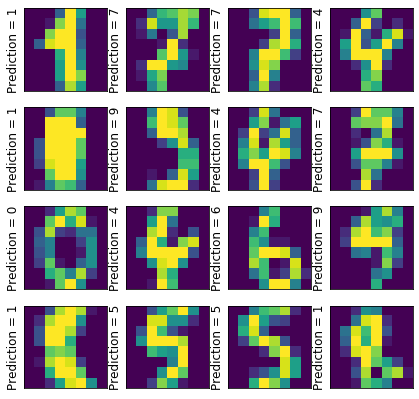

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

results = model.predict_classes(x_test[:100])

tmp = np.squeeze(x_test, axis=3)

plt.figure(figsize=(7, 7))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(tmp[i])
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('Prediction = %d' % results[i], fontsize=12)